<a href="https://colab.research.google.com/github/rejahub/My-Projects/blob/main/DS_Project_V_Reja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns

#Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
myDirFiles = '/content/drive/MyDrive/Colab Notebooks/Digital Skola/My Project/Project V'
os.chdir(myDirFiles)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Digital Skola/My Project/Project V/marketing-churn.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


#Data Understanding

In [ ]:
#Menampilkan jumlah rows dan columns
df.shape

(2240, 28)

In [ ]:
#Menampilkan type data
df.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

In [ ]:
#Menampilkan jumlah NaN pada data
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [ ]:
# Memperbaiki penamaan variabel income
df['Income'] = df[' Income ']
df = df.drop(' Income ', axis=1)

In [ ]:
# Cek distribusi target
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

##Unvariate Analysis

###Income

In [ ]:
def dollar_to_int(d):
    # input: d: String
    # kalau null, tidak perlu di convert
    if pd.isnull(d):
        return d
    else:
        d = d.strip()
        d = d[1:]
        d = d[:-3]
        d = d.replace(',', '')
        return int(d)

input_dollar =' $84,835.00 ' 
print(input_dollar)
print("Output:", dollar_to_int(input_dollar)) # ekspektasi output: 84835


# NaN --> di pandas dia type float
df['Income_Real'] = df['Income'].apply(dollar_to_int)
df['Income_Real']

 $84,835.00 
Output: 84835


0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income_Real, Length: 2240, dtype: float64

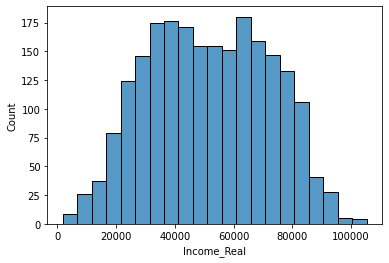

In [ ]:
sns.histplot(df, x='Income_Real')

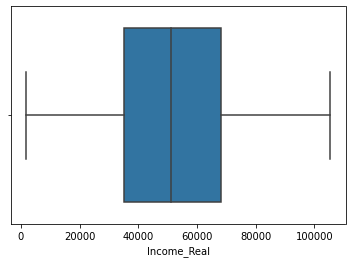

In [ ]:
# Menghilangkan outliers
sns.boxplot(data=df, x='Income_Real')

In [ ]:
# IQR
Q1 = df['Income_Real'].quantile(0.3)
Q3 = df['Income_Real'].quantile(0.7)
IQR = Q3 - Q1
UPPER_LIMIT = Q3 + (1.5 * IQR)
df = df[df['Income_Real'] <= UPPER_LIMIT]

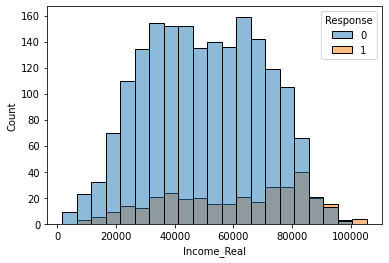

In [ ]:
sns.histplot(df, x='Income_Real', hue='Response')

In [ ]:
# bootstrap
# Ide: dari setiap kelas, kita ambil sample. Kita cari rata-rata/median. 
# Lakukan sebanyak n kali. Rata-rata ini yang akan kita plot.

def bootstrap(df, column):

    BOOTS_RESULT = []
    for i in range(200):
        # sampling kelas Response = 0
        mean_0 = df[df['Response'] == 0][column].sample(100).mean()
        mean_1 = df[df['Response'] == 1][column].sample(100).mean()

        BOOTS_RESULT.append((mean_0, 0))
        BOOTS_RESULT.append((mean_1, 1))
    df_boots = pd.DataFrame(BOOTS_RESULT, columns=[column, 'Response'])
    return df_boots

df_boots = bootstrap(df, 'Income_Real')

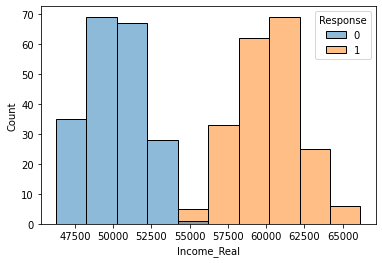

In [ ]:
sns.histplot(df_boots, x='Income_Real', hue='Response')

###Education

In [ ]:
#Menghitung jumlah nilai pada column "Education"
df['Education'].value_counts()

Graduation    1113
PhD            476
Master         364
2n Cycle       200
Basic           54
Name: Education, dtype: int64

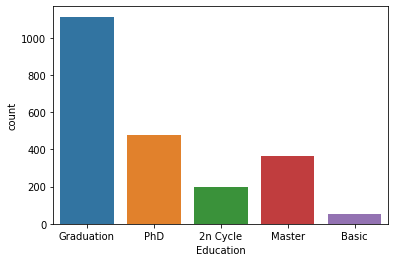

In [ ]:
sns.countplot(data=df, x='Education')

In [ ]:
per_response = df.groupby(['Education', 'Response']).size().to_frame('Total_Per_Response')
per_education = df.groupby('Education').size().to_frame('Total_Per_Edu')

joined = per_response.join(
    per_education,
    on='Education'
).reset_index()

joined['ratio'] = joined['Total_Per_Response'] / joined['Total_Per_Edu']
joined

,Education,Response,Total_Per_Response,Total_Per_Edu,ratio
0,2n Cycle,0,178,200,0.890000
1,2n Cycle,1,22,200,0.110000
2,Basic,0,52,54,0.962963
3,Basic,1,2,54,0.037037
4,Graduation,0,961,1113,0.863432
5,Graduation,1,152,1113,0.136568
6,Master,0,308,364,0.846154
7,Master,1,56,364,0.153846
8,PhD,0,375,476,0.787815
9,PhD,1,101,476,0.212185


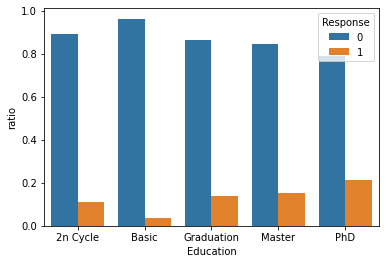

In [ ]:
sns.barplot(data=joined, y='ratio', hue='Response', x='Education')

###Marital Status

In [ ]:
df['Marital_Status'].value_counts()

Married     854
Together    569
Single      470
Divorced    231
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

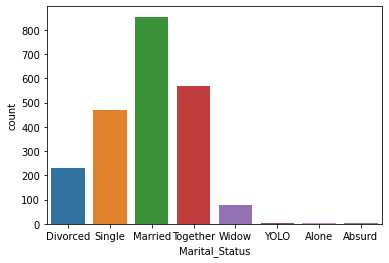

In [ ]:
sns.countplot(data=df, x='Marital_Status')

In [ ]:
per_response = df.groupby(['Marital_Status', 'Response']).size().to_frame('Total_Per_Response')
per_education = df.groupby('Marital_Status').size().to_frame('Total_Per_Edu')

joined = per_response.join(
    per_education,
    on='Marital_Status'
).reset_index()

joined['ratio'] = joined['Total_Per_Response'] / joined['Total_Per_Edu']
joined

,Marital_Status,Response,Total_Per_Response,Total_Per_Edu,ratio
0,Absurd,0,1,2,0.500000
1,Absurd,1,1,2,0.500000
2,Alone,0,2,3,0.666667
3,Alone,1,1,3,0.333333
4,Divorced,0,183,231,0.792208
5,Divorced,1,48,231,0.207792
6,Married,0,756,854,0.885246
7,Married,1,98,854,0.114754
8,Single,0,364,470,0.774468
9,Single,1,106,470,0.225532


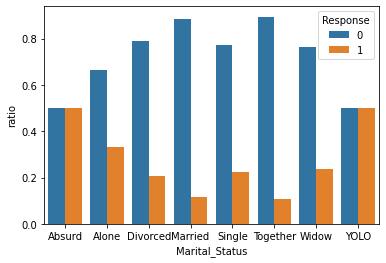

In [ ]:
sns.barplot(data=joined, y='ratio', hue='Response', x='Marital_Status')

In [ ]:
#Menghilangkan kategori yang minim data
df = df[~df['Marital_Status'].isin(['Alone', 'YOLO', 'Absurd'])]

#Data Preprocessing

##Feature Engineering

###Age

In [ ]:
df['Age'] = 2022 - df['Year_Birth']

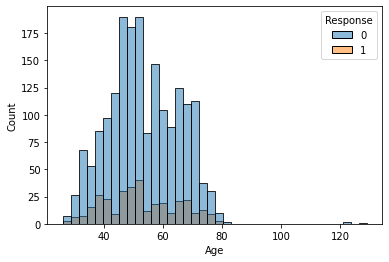

In [ ]:
sns.histplot(data=df, x='Age', hue='Response')

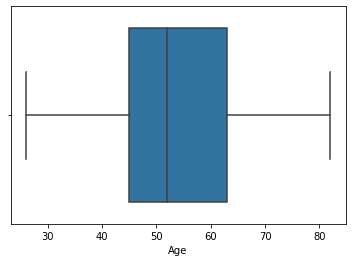

In [ ]:
sns.boxplot(data=df, x='Age')

In [ ]:
df = df[df['Age'] <= 100]
df.shape

(2197, 30)

### Bootstraping

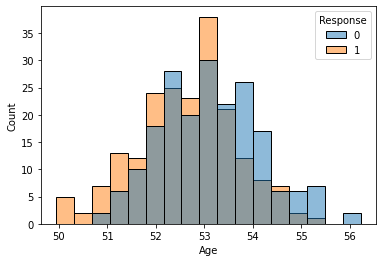

In [ ]:
df_boots = bootstrap (df, 'Age')
sns.histplot(data=df_boots, x='Age', hue='Response')

###Day User Active

In [ ]:
from datetime import datetime

def get_user_active(s):
    month, day, year = s.split('/')
    year = '20' + year
    base = datetime(int(year), int(month), int(day))
    elapse_days = datetime.now() - base
    return elapse_days.days

df['Active_For'] = df['Dt_Customer'].apply(get_user_active)
df['Active_For']

0       3026
1       3027
2       3060
3       3062
4       3095
        ... 
2235    3492
2236    3536
2237    3586
2238    3590
2239    3679
Name: Active_For, Length: 2197, dtype: int64

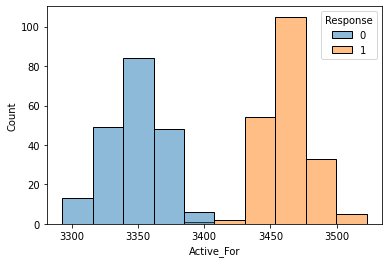

In [ ]:
df_boots = bootstrap (df, 'Active_For')
sns.histplot(data=df_boots, x='Active_For', hue='Response')

###Ratio Accept Campaign

In [ ]:
df['Accept_Cmp_Ratio'] = (df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']) / 5

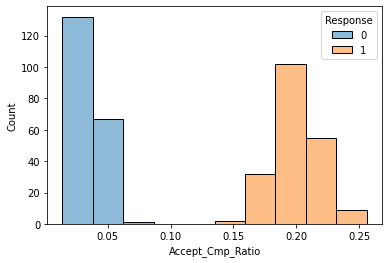

In [ ]:
df_boots = bootstrap (df, 'Accept_Cmp_Ratio')
sns.histplot(data=df_boots, x='Accept_Cmp_Ratio', hue='Response')

###Correlation Analysis

In [ ]:
FEATURE = ['Income_Real', 'Education', 'Marital_Status', 'Age', 'Active_For', 'Accept_Cmp_Ratio']
TARGET = 'Response'

X = df[FEATURE]
y = df[TARGET]

In [ ]:
X.shape

(2197, 6)

In [ ]:
y.shape

(2197,)

##Train & Testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: \n", y_train.value_counts())
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: \n", y_test.value_counts())

Shape of X_train:  (1757, 6)
Shape of y_train: 
 0    1493
1     264
Name: Response, dtype: int64
Shape of X_test:  (440, 6)
Shape of y_test: 
 0    374
1     66
Name: Response, dtype: int64


In [ ]:
# transformasi data dengan Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

FEATURE_CAT = ['Education', 'Marital_Status']
FEATURE_NUM =  ['Income_Real', 'Age', 'Active_For', 'Accept_Cmp_Ratio']

scaler = StandardScaler() 
encoder = OneHotEncoder(sparse=False)

scaler.fit(X_train[FEATURE_NUM])
encoder.fit(X_train[FEATURE_CAT])

OneHotEncoder(sparse=False)

In [ ]:
def transform(X):
    X_scaled = scaler.transform(X[FEATURE_NUM])
    X_encoded = encoder.transform(X[FEATURE_CAT])
    X_stack = np.hstack((X_scaled, X_encoded))
    return X_stack

X_train_stack = transform(X_train)
X_test_stack = transform(X_test)

In [ ]:
X_train_stack.shape

(1757, 14)

#Modelling

In [ ]:
#Pembuatan model Machine Learning
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = [
    ('svm', SVC()),
    ('RF', RandomForestClassifier()),
    ('LogReg', LogisticRegression())
]


for model_name, model in models:
    print("Training {}".format(model_name))
    
    model.fit(X_train_stack, y_train)
    predicted = model.predict(X_test_stack)
    
    prec = precision_score(y_test, predicted)
    recall = recall_score(y_test, predicted)
    
    print("Model: {}, Prec: {:.2F}, Recall: {:.2F}".format(
        model_name, prec, recall
    ))

Training svm
Model: svm, Prec: 0.79, Recall: 0.33
Training RF
Model: RF, Prec: 0.67, Recall: 0.36
Training LogReg
Model: LogReg, Prec: 0.72, Recall: 0.35


##Sampling Method

In [ ]:
%pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Metode Random Oversamling dan Undersampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

over = RandomOverSampler(sampling_strategy={1: 500})
under = RandomUnderSampler(sampling_strategy={0: 500})

X_train_sample, y_train_sample = over.fit_resample(X_train, y_train)
X_train_sample, y_train_sample = under.fit_resample(X_train_sample, y_train_sample)

In [ ]:
y_train_sample.value_counts()

0    500
1    500
Name: Response, dtype: int64

In [ ]:
X_train_sample_stack = transform(X_train_sample)

models = [
    ('svm', SVC()),
    ('RF', RandomForestClassifier()),
    ('LogReg', LogisticRegression())
]


for model_name, model in models:
    print("Training {}".format(model_name))
    
    model.fit(X_train_sample_stack, y_train_sample)
    predicted = model.predict(X_test_stack)
    
    prec = precision_score(y_test, predicted)
    recall = recall_score(y_test, predicted)
    
    print("Model: {}, Prec: {:.2F}, Recall: {:.2F}".format(
        model_name, prec, recall
    ))

Training svm
Model: svm, Prec: 0.39, Recall: 0.68
Training RF
Model: RF, Prec: 0.37, Recall: 0.62
Training LogReg
Model: LogReg, Prec: 0.35, Recall: 0.70


#Evaluation

##Hyperparameter Search

In [ ]:
from sklearn.model_selection import GridSearchCV

PARAMETER_GRID = {
    'C': [0.1, 0.01, 0.05, 0.5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : ['scale', 'auto'],
    'class_weight': ['balanced', {0: 1, 1: 2}, {0: 1, 1: 10}]
}

cv = GridSearchCV(SVC(), PARAMETER_GRID, verbose=2, scoring='precision')

In [ ]:
cv.fit(X_train_stack, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=poly; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=poly; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=poly; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=poly; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=poly; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   0.1s
[CV] 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=scale, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=scale, kernel=sigmoid; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=linear; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=poly; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=rbf; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=rbf; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=rbf; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=sigmoid; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=sigmoid; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=sigmoid; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=sigmoid; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=sigmoid; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END C=0.01, class_weight={0: 1, 1: 10}, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 10}, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 10}, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 10}, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 10}, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 10}, gamma=scale, kernel=poly; total time=   0.2s
[CV] END C=0.01, class_weight={0: 1, 1: 10}, gamma=scale, kernel=poly; total time=   0.2s
[CV] END C=0.01, class_weight={0: 1, 1: 10}, gamma=scale, kernel=poly; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 10}, gamma=scale, kernel=poly; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 10}, gamma=scale, kernel=poly; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 10}, gamma=scale, kernel=rbf; total time=   0.2s
[

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 0.05, 0.5],
                         'class_weight': ['balanced', {0: 1, 1: 2},
                                          {0: 1, 1: 10}],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='precision', verbose=2)

In [ ]:
cv.best_params_

{'C': 0.05, 'class_weight': {0: 1, 1: 2}, 'gamma': 'auto', 'kernel': 'poly'}

In [ ]:
predicted = cv.predict(X_test_stack)

prec = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)
    
print("Prec: {:.2F}, Recall: {:.2F}".format(
    prec, recall
))

Prec: 0.88, Recall: 0.23
